### Importing required libraries

In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import  ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import  display
from   pylab                           import  rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Reading time series data 

In [2]:
df = pd.read_csv('AirPassenger.csv',parse_dates=True,index_col = 'Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.tail()

,Pax
Year-Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### Plotting time series

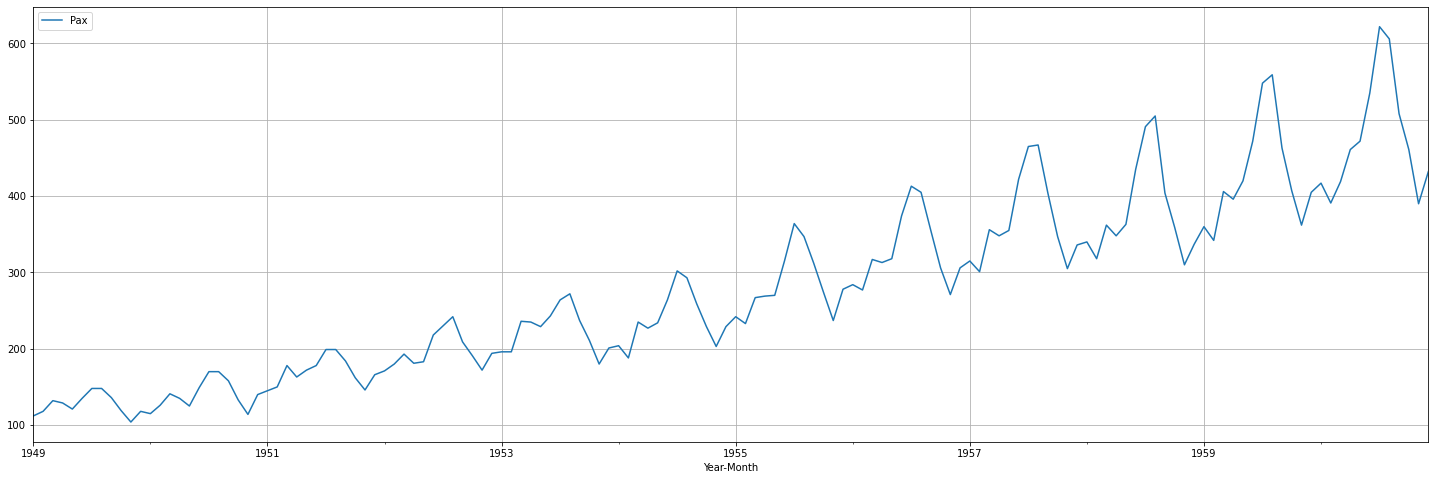

In [4]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

## Spliting time series data

### Most recent observations will be used to test the model while remaining series will be used to train the model

### if time series has seasonality, then test data must include atleast one seasonal period. 

In [5]:
train_end=datetime(1958,12,31)
test_end=datetime(1960,12,31)

In [6]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [7]:
print('Train')
display(train)
print('Test')
display(test)

Train


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-08-01,505
1958-09-01,404
1958-10-01,359


Test


,Pax
Year-Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


# Double Exponential Smoothing / Holt's linear Method

In [8]:
model_DES = Holt(train, initialization_method='estimated')

#### training the double exponential model

In [9]:
model_DES_fit1 = model_DES.fit(optimized=True)

In [10]:
model_DES_fit1.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,Holt,SSE,98090.127
Optimized:,True,AIC,812.738
Trend:,Additive,BIC,823.888
Seasonal:,None,AICC,813.481
Seasonal Periods:,None,Date:,"Wed, 21 Jul 2021"
Box-Cox:,False,Time:,12:35:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0001,beta,True


#### Predicting forecast

In [11]:
DES_predict1 = model_DES_fit1.forecast(steps=len(test))

In [36]:
DES_predict1

1959-01-01    338.934275
1959-02-01    340.991991
1959-03-01    343.049707
1959-04-01    345.107423
1959-05-01    347.165139
1959-06-01    349.222855
1959-07-01    351.280572
1959-08-01    353.338288
1959-09-01    355.396004
1959-10-01    357.453720
1959-11-01    359.511436
1959-12-01    361.569152
1960-01-01    363.626868
1960-02-01    365.684584
1960-03-01    367.742300
1960-04-01    369.800017
1960-05-01    371.857733
1960-06-01    373.915449
1960-07-01    375.973165
1960-08-01    378.030881
1960-09-01    380.088597
1960-10-01    382.146313
1960-11-01    384.204029
1960-12-01    386.261745
Freq: MS, dtype: float64

#### Lets plot the forecast for SES and DES

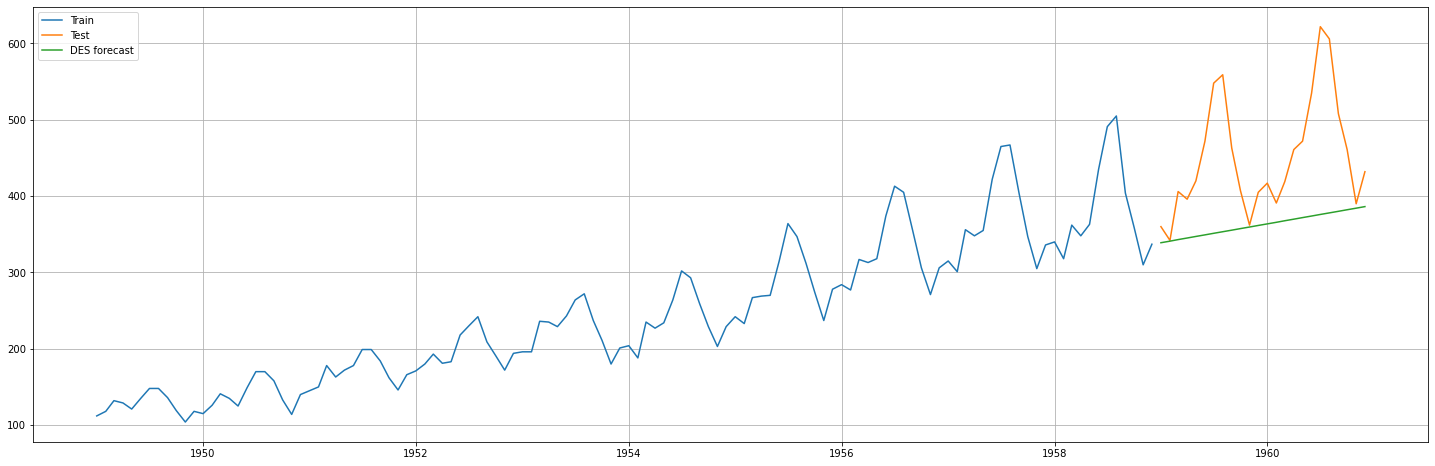

In [12]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict1, label='DES forecast')
plt.legend(loc='best')
plt.grid()

# Triple Exponential Smoothing / Holt-Winters Method

#### lets build model using 'additive' seasonality

In [74]:
model_TES_add = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')

#### training the model

In [75]:
model_TES_add = model_TES_add.fit(optimized=True)

In [76]:
model_TES_add.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,ExponentialSmoothing,SSE,10805.203
Optimized:,True,AIC,572.035
Trend:,Multiplicative,BIC,616.635
Seasonal:,Multiplicative,AICC,578.807
Seasonal Periods:,12,Date:,"Wed, 21 Jul 2021"
Box-Cox:,False,Time:,12:44:06
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3796558,alpha,True
smoothing_trend,4.4637e-10,beta,True


#### predicting forecast

In [77]:
TES_add_predict =  model_TES_add.forecast(len(test))

#### lets plot foecast results

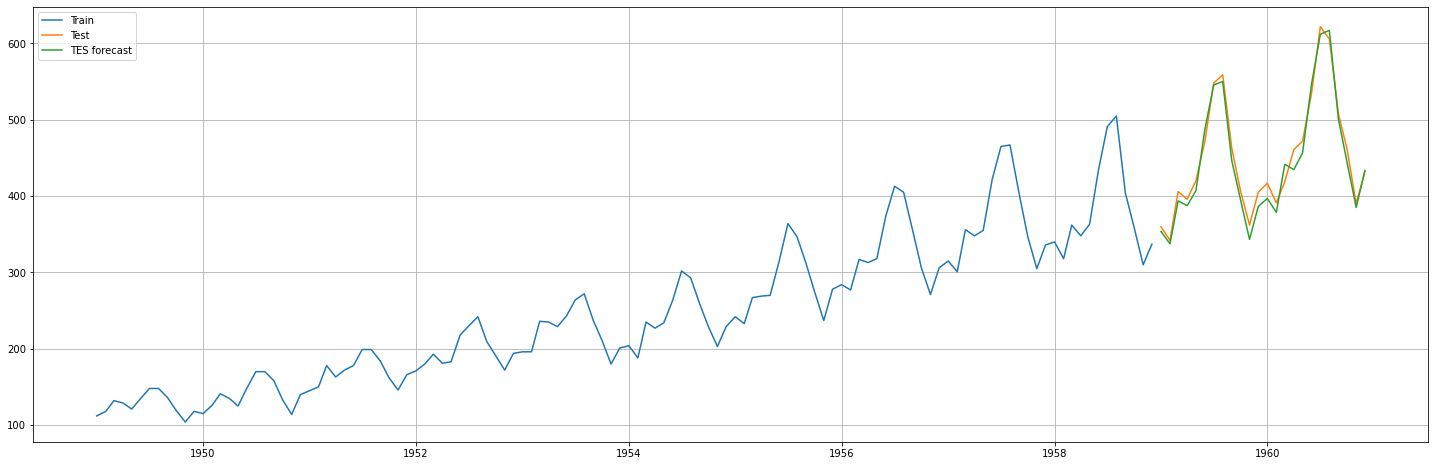

In [78]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_add_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

### Evaluating Model Performance

In [79]:
mean_squared_error(test.values,TES_add_predict.values,squared=False)

13.87915336998583

In [80]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [81]:
MAPE(test['Pax'].values,TES_add_predict.values)

2.813305003034415

#### lets build model uaing 'multiplicative' forecast

In [46]:
model_TES_mul = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')

#### training the model

In [47]:
model_TES_mul = model_TES_mul.fit(optimized=True)

In [48]:
model_TES_mul.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,ExponentialSmoothing,SSE,10805.203
Optimized:,True,AIC,572.035
Trend:,Multiplicative,BIC,616.635
Seasonal:,Multiplicative,AICC,578.807
Seasonal Periods:,12,Date:,"Tue, 29 Jun 2021"
Box-Cox:,False,Time:,12:48:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3796558,alpha,True
smoothing_trend,4.4637e-10,beta,True


#### predicting forecast

In [49]:
TES_mul_predict =  model_TES_mul.forecast(len(test))

#### lets plot foecast results for  H-W model with multiplicative seasonality

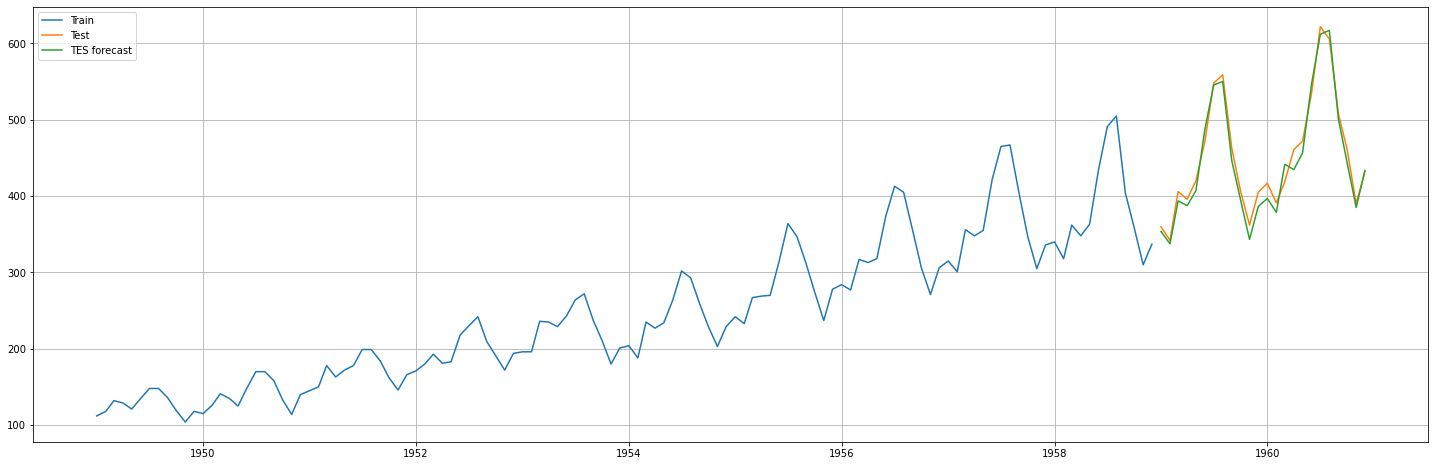

In [50]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_mul_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

## Evaluating Model Performance

In [51]:
mean_squared_error(test['Pax'].values,TES_mul_predict.values,squared=False)

13.87915336998583

#### Defining Mean Absolute Percentage error

In [52]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [100]:
test.values

array([[360],
       [342],
       [406],
       [396],
       [420],
       [472],
       [548],
       [559],
       [463],
       [407],
       [362],
       [405],
       [417],
       [391],
       [419],
       [461],
       [472],
       [535],
       [622],
       [606],
       [508],
       [461],
       [390],
       [432]], dtype=int64)

In [98]:
TES_mul_predict.values

array([450.67530167, 424.81851011, 475.49474415, 504.076271  ,
       517.8719181 , 590.14547826, 684.22707385, 678.03084729,
       567.11177388, 507.82377657, 434.71856489, 485.97999553])

#### Mean Absolute Percentage Error for simple forecasting model

In [99]:
MAPE(test['Pax'].values,TES_mul_predict.values)

ValueError: operands could not be broadcast together with shapes (24,) (12,) 

## forecasting

In [87]:
model_TES_mul = ExponentialSmoothing(df,trend='multiplicative',seasonal='multiplicative')

In [88]:
model_TES_mul = model_TES_mul.fit(optimized=True)

In [89]:
model_TES_mul.summary()

Dep. Variable:,Pax,No. Observations:,144
Model:,ExponentialSmoothing,SSE,15805.297
Optimized:,True,AIC,708.553
Trend:,Multiplicative,BIC,756.070
Seasonal:,Multiplicative,AICC,714.025
Seasonal Periods:,12,Date:,"Wed, 21 Jul 2021"
Box-Cox:,False,Time:,12:52:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2919039,alpha,True
smoothing_trend,3.3739e-10,beta,True


In [90]:
TES_mul_predict =  model_TES_mul.forecast(12)

In [91]:
TES_mul_predict

1961-01-01    450.675302
1961-02-01    424.818510
1961-03-01    475.494744
1961-04-01    504.076271
1961-05-01    517.871918
1961-06-01    590.145478
1961-07-01    684.227074
1961-08-01    678.030847
1961-09-01    567.111774
1961-10-01    507.823777
1961-11-01    434.718565
1961-12-01    485.979996
Freq: MS, dtype: float64

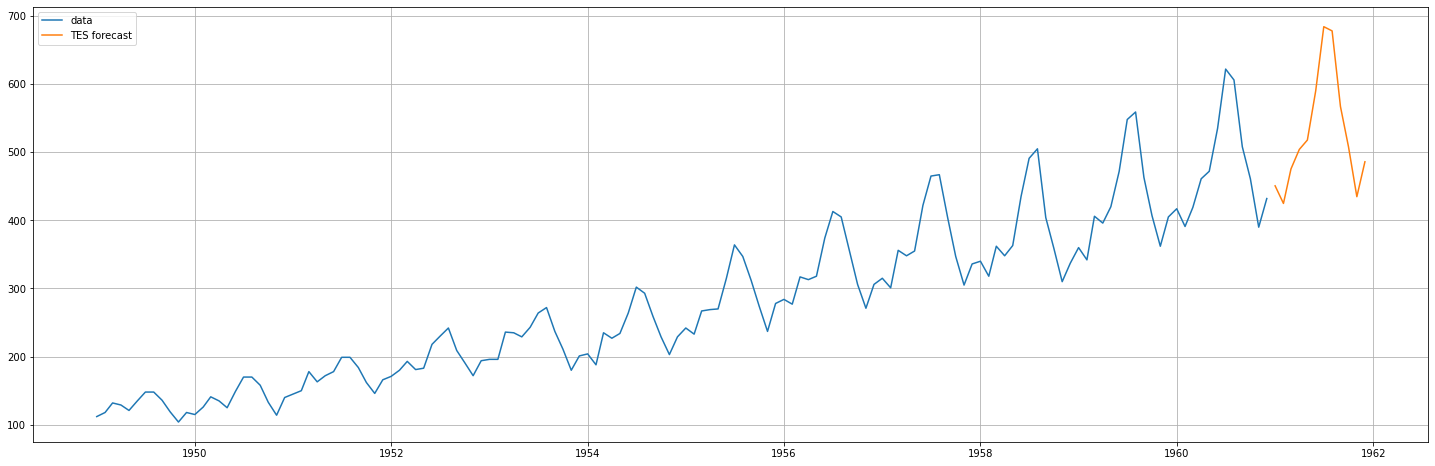

In [92]:
plt.plot(df, label='data')
plt.plot(TES_mul_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

# END